In [1]:
import pymks

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [5]:
from pymks.datasets import make_elastic_stress_random


sample_size = 200
grain_size = [(15, 2), (2, 15), (7, 7), (8, 3), (3, 9), (2, 2)]
n_sets = len(grain_size)
n_samples = [sample_size] * n_sets

cvec = np.zeros((n_sets*sample_size,))
for ii in xrange(n_sets):
    c = ii*sample_size
    c_ = (ii+1)*sample_size
    cvec[c:c_]=ii

elastic_modulus = (100, 10000)
poissons_ratio = (0.3, 0.3)
macro_strain = 0.001
size = (21, 21)

X, y = make_elastic_stress_random(n_samples=n_samples, size=size, grain_size=grain_size,
                                  elastic_modulus=elastic_modulus, poissons_ratio=poissons_ratio,
                                  macro_strain=macro_strain, seed=0)

y = y/macro_strain

In [6]:
print(X.shape)
print(y.shape)

(1200L, 21L, 21L)
(1200L,)


C:\Users\nhpnp3\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\nhpnp3\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


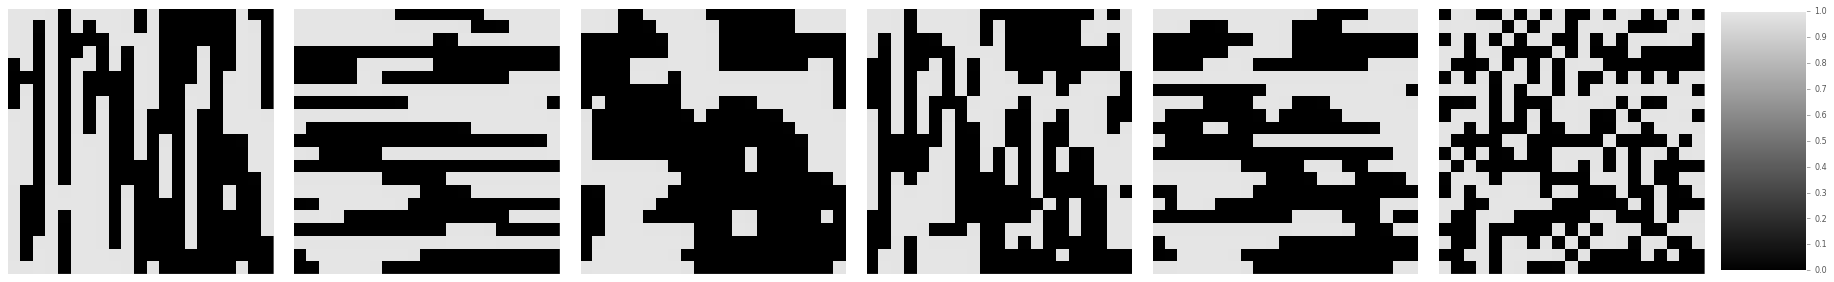

[ 3081.93184539  -782.80191455  -344.28151324  1859.91707529  -650.62559464
   784.36728922]


In [7]:
from pymks.tools import draw_microstructures


X_examples = X[::sample_size]
draw_microstructures(X_examples[:6])
print y[::sample_size]

In [ ]:
tmp = np.argmin(y)
print tmp
print y[tmp]
tmp2=X[tmp, ...]
tmp2 = tmp2[None, :, :]
print tmp2.shape
draw_microstructures(tmp2)

In [ ]:
import get_M

M = get_M.get_M(X)

In [ ]:
import correlate as corr

tail = 0  # phase at tail of vector
head = 0  # phase at head of vector
ff = corr.correlate(M, tail, head)

In [ ]:
from plot_correlation import pltcorr

sn = 0
pltcorr(X[sn, ...], ff[sn, ...])

In [ ]:
from get_new_space import new_space

pca, red, ratios = new_space(ff)

print red.shape

In [ ]:
from plot_explained_variance import variance

variance([.5, 100, 80, 105], ratios)

In [ ]:
from plot_pc_map import pltmap

pcA = 0
pcB = 1

pltmap(red, pcA, pcB, n_sets, sample_size)

In [ ]:
from get_linkage import linkage

red_c = red[:5*sample_size,...]
red_v = red[5*sample_size:,...]
cvec_c = cvec[:5*sample_size]
y_c = y[:5*sample_size]
y_v = y[5*sample_size:]

n_pc_max = 15
n_poly_max = 3

Rpred_c, Rpred_cv, Rpred_v, order = linkage(red_c, red_v, cvec_c,
                                            y_c, y_v,
                                            n_pc_max, n_poly_max)

In [ ]:
from plot_err_v_pc import plterr

ubnd = 4
deg = 2
plterr(Rpred_c, y_c, order, deg, n_pc_max, ubnd)
plterr(Rpred_cv, y_c, order, deg, n_pc_max, ubnd)
plterr(Rpred_v, y_v, order, deg, n_pc_max, ubnd)

In [ ]:
from plot_parity import parity

Rpred = np.zeros((n_pc_max*n_poly_max, sample_size*n_sets))
Rpred[:, :5*sample_size]=Rpred_c
Rpred[:, 5*sample_size:]=Rpred_v

n_pc = 10
n_poly = 3
parity(y, Rpred, order, sample_size, n_sets, n_pc, n_poly)